In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [44]:
tweets_df = pd.read_csv('TSLA.csv')
stock_prices_df = pd.read_csv('TSLA 2.csv')

In [45]:
merged_df = pd.merge(tweets_df, stock_prices_df[['Date', 'Close']], on='Date')

X = merged_df[['Date', 'Close']]
y = merged_df['Close']

In [46]:
tweet_features = merged_df.iloc[:, 1:] 

In [47]:
merged_df = pd.merge(tweets_df, stock_prices_df[['Date', 'Close']], on='Date')

tweet_features = merged_df.iloc[:, 1:]

merged_df['All_Tweets'] = merged_df.iloc[:, 1:].apply(lambda row: ' '.join(map(str, row)), axis=1)

tweet_features = merged_df[['All_Tweets']]

merged_df = pd.merge(tweets_df, stock_prices_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']], on='Date')

stock_features = merged_df[['Open', 'High', 'Low', 'Volume']]

X = pd.concat([tweet_features, stock_features], axis=1)

y = merged_df['Close']

In [48]:
print(merged_df.columns)


Index(['Date', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', 'Open', 'High', 'Low',
       'Close', 'Volume'],
      dtype='object')


In [49]:
print(stock_prices_df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [50]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

scaler_target = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_target.fit_transform(y_encoded.reshape(-1, 1))

vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(tweet_features['All_Tweets'])
X_text_dense = X_text.toarray()

scaler_text = MinMaxScaler(feature_range=(0, 1))
X_text_scaled = scaler_text.fit_transform(X_text_dense)

scaler_numerical = MinMaxScaler(feature_range=(0, 1))
X_numerical_scaled = scaler_numerical.fit_transform(stock_features)

X_scaled = np.concatenate((X_text_scaled, X_numerical_scaled), axis=1)

y_encoded = label_encoder.fit_transform(y)

scaler_target = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_target.fit_transform(y_encoded.reshape(-1, 1))


In [51]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.impute import SimpleImputer

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Replace non-numeric values with NaN
X_numeric = X.apply(pd.to_numeric, errors='coerce')

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values
X_imputed = imputer.fit_transform(X_numeric)

# Scale the imputed data
X_scaled = scaler.fit_transform(X_imputed)


In [52]:
import numpy as np

# Convert y to a NumPy array
y_array = y.values

# Reshape y to ensure it's a 2D array with one column
y_reshaped = y_array.reshape(-1, 1)

# Scale the reshaped y
y_scaled = scaler.fit_transform(y_reshaped)


In [53]:
# Prepare data for LSTM
sequence_length = 10  # Define sequence length
X_lstm = []
y_lstm = []
for i in range(len(X_scaled) - sequence_length):
    X_lstm.append(X_scaled[i:i + sequence_length])
    y_lstm.append(y_scaled[i + sequence_length])

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)



In [54]:
# Split data into training and test sets
split_index = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split_index], X_lstm[split_index:]
y_train, y_test = y_lstm[:split_index], y_lstm[split_index:]



In [55]:
from tensorflow.keras.models import load_model

model = load_model("Sequential_1.h5")

In [56]:
# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))


C:\Users\SANKETH S HONAVAR\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [65]:
# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010     
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.3786e-04 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012     
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011     
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011     
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8310e-04 
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010     
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss:

In [66]:
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 
Mean Squared Error: 0.005133964587002993


In [67]:
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 0.07165168935205221


In [69]:
model.save("Sequential_9.h5")

In [70]:
predictions = model.predict(X_test)

# Inverse transform predictions to get actual stock prices
#predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [63]:
#print("Sample Predictions:")
#for pred, actual in zip(predictions[:5], y_test[:5]):
#    print(f"Predicted: {pred}, Actual: {actual}")

In [64]:
#predictions = model.predict(X_test)

In [157]:
#for actual, predicted in zip(y_test[:5], predictions[:5]):
#    print("Actual:", actual, "\tPredicted:", predicted)


In [158]:
#predicted_values = model.predict(X_test)

# Scale predicted values
#predicted_values_scaled = scaler_target.transform(predicted_values.reshape(-1, 1))


In [159]:
# Inverse transform the scaled predicted values
#predicted_values_original_scale = scaler_target.inverse_transform(predicted_values_scaled)


In [160]:
#for actual, predicted in zip(y_test[:5], predictions[:5]):
#    print("Actual:", actual, "\tPredicted:", predicted)


In [25]:
actual_values_original_scale = scaler.inverse_transform(y_test[:5])
predicted_values_original_scale = scaler.inverse_transform(predictions[:5])

print("Sample Predictions:")
for actual, predicted in zip(actual_values_original_scale, predicted_values_original_scale):
    print("Actual:", actual[0], "\tPredicted:", predicted[0])

Sample Predictions:
Actual: 781.880005 	Predicted: 746.41077
Actual: 701.320007 	Predicted: 774.3251
Actual: 761.190002 	Predicted: 754.84326
Actual: 768.210022 	Predicted: 716.9567
Actual: 782.580017 	Predicted: 715.2184


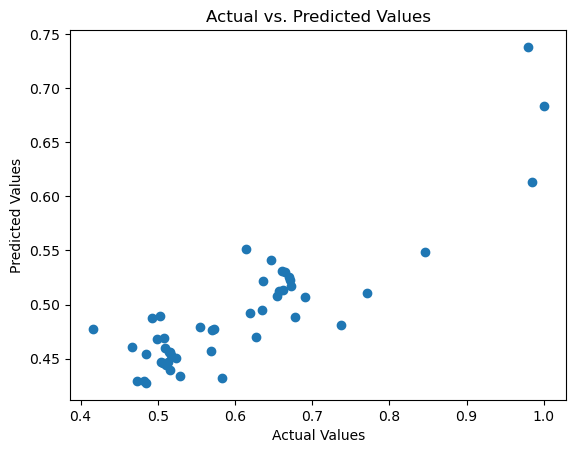

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

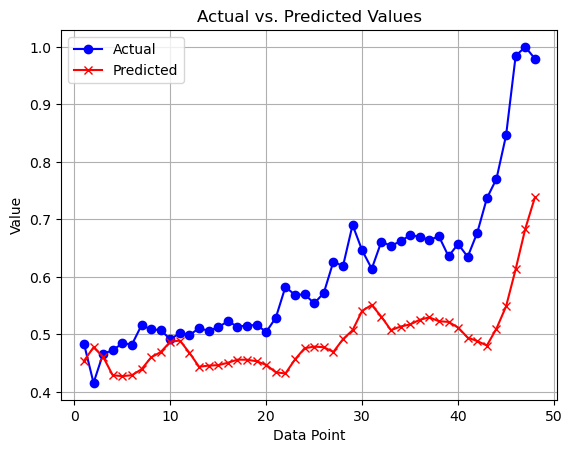

In [22]:
import matplotlib.pyplot as plt

# Assuming y_test and predictions are the actual and predicted values respectively
indices = range(1, len(y_test) + 1)

# Plot actual values
plt.plot(indices, y_test, marker='o', color='blue', label='Actual')

# Plot predicted values
plt.plot(indices, predictions, marker='x', color='red', label='Predicted')

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [76]:
actual_values_original_scale = scaler.inverse_transform(y_test[:5])
predicted_values_original_scale = scaler.inverse_transform(predictions[:5])

print("Sample Predictions:")
for actual, predicted in zip(actual_values_original_scale, predicted_values_original_scale):
    print("Actual:", actual[0], "\tPredicted:", predicted[0])

Sample Predictions:
Actual: 781.880005 	Predicted: 775.23425
Actual: 701.320007 	Predicted: 800.6746
Actual: 761.190002 	Predicted: 729.9386
Actual: 768.210022 	Predicted: 703.76337
Actual: 782.580017 	Predicted: 764.21594


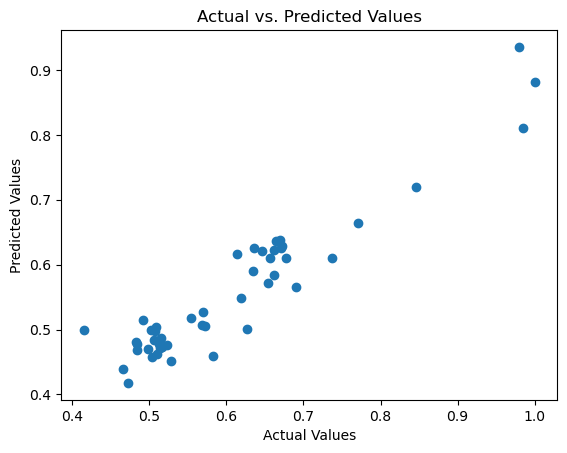

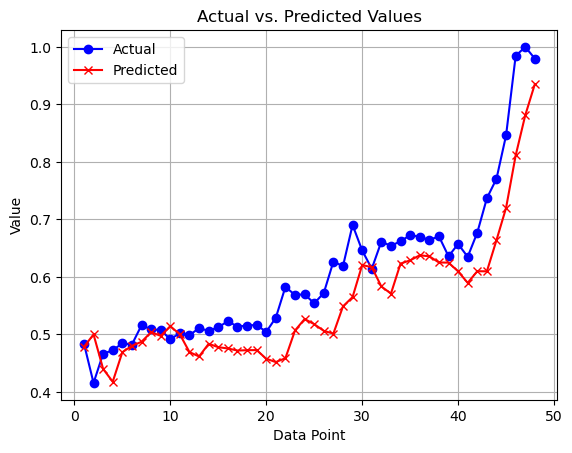

In [73]:
import matplotlib.pyplot as plt

# Assuming y_test and predictions are the actual and predicted values respectively
indices = range(1, len(y_test) + 1)

# Plot actual values
plt.plot(indices, y_test, marker='o', color='blue', label='Actual')

# Plot predicted values
plt.plot(indices, predictions, marker='x', color='red', label='Predicted')

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


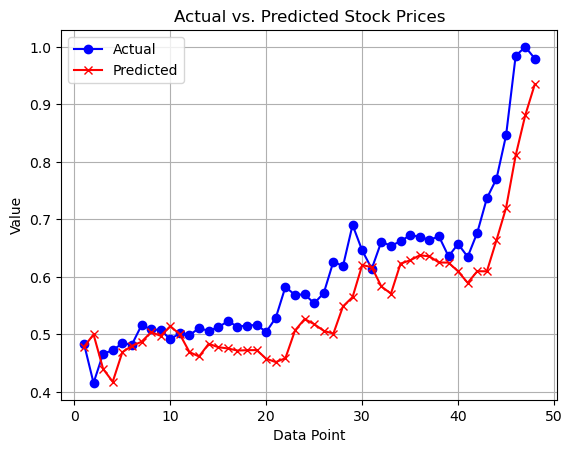

In [77]:
import matplotlib.pyplot as plt

# Assuming y_test and predictions are the actual and predicted values respectively
indices = range(1, len(y_test) + 1)

# Plot actual values
plt.plot(indices, y_test, marker='o', color='blue', label='Actual')

# Plot predicted values
plt.plot(indices, predictions, marker='x', color='red', label='Predicted')

# Set labels and title (modified)
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Stock Prices')  # Updated title

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()
